In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- Read CSV file

In [2]:
lead=pd.read_csv('C:\\UpGrad\\Logistic Regression\\Lead+Scoring+Case+Study\\Lead Scoring Assignment\\Leads.csv')

In [3]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [4]:
lead.describe(percentiles=[0.95])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000,17.000000,20.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
round(lead['TotalVisits'].mean())

3

In [6]:
(lead.isnull().sum()/len(lead))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

- We can see that high no of null values in columns, we drop column which have more that 30% of null values

In [7]:
lead.drop_duplicates(inplace=True)

In [8]:
lead.shape

(9240, 37)

- We drop the columns with single value as it will not be able to produce any useful result.

In [9]:
np.unique(lead.Magazine)

array(['No'], dtype=object)

In [10]:
np.unique(lead['Receive More Updates About Our Courses'])

array(['No'], dtype=object)

In [11]:
np.unique(lead['Update me on Supply Chain Content'])

array(['No'], dtype=object)

In [12]:
np.unique(lead['Get updates on DM Content'])

array(['No'], dtype=object)

In [13]:
np.unique(lead['I agree to pay the amount through cheque'])

array(['No'], dtype=object)

In [14]:
lead.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','Prospect ID','Lead Number','Last Activity','Tags'],axis=1,inplace=True)

In [15]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 28 columns):
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Country                                          6779 non-null object
Specialization                                   7802 non-null object
How did you hear about X Education               7033 non-null object
What is your current occupation                  6550 non-null object
What matters most to you in choosing a course    6531

In [16]:
(lead.isnull().sum()/len(lead))*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.000000
Newspaper                                         0.0000

In [17]:
lead['Lead Quality'].isnull().sum()

4767

In [18]:
lead['Lead Source'].astype('category').value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
Pay per Click Ads       1
welearnblog_Home        1
NC_EDM                  1
WeLearn                 1
blog                    1
testone                 1
youtubechannel          1
Name: Lead Source, dtype: int64

In [19]:
lead.loc[lead['Lead Source'].isnull(),'Lead Source']='Google'

- Since the null % in lead source is within 1% we impute it with most occuring value.

- Imputing other numerical columns with mean value of column.

In [20]:
lead.loc[lead['TotalVisits'].isnull(),'TotalVisits']=round(lead['TotalVisits'].mean())

In [21]:
lead.loc[lead['Page Views Per Visit'].isnull(),'Page Views Per Visit']=round(lead['Page Views Per Visit'].mean())

In [22]:
lead.loc[lead['How did you hear about X Education']=='Select','How did you hear about X Education']=np.nan

- Since select is a dropdown which is the default value when the user does not select any option this is populated.
- So in some cases based on the buisiness requirement it is treated as null or other option

In [23]:
lead.loc[(lead['Lead Profile']=='Select')|(lead['Lead Profile'].isnull()),'Lead Profile']='Other Leads'

In [24]:
(lead.isnull().sum()/len(lead))*100

Lead Origin                                       0.000000
Lead Source                                       0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       0.000000
Total Time Spent on Website                       0.000000
Page Views Per Visit                              0.000000
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.000000
Newspaper                                         0.0000

In [25]:
lead.drop(['How did you hear about X Education'],axis=1,inplace=True)

In [26]:
lead['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
Germany                    4
Canada                     4
Nigeria                    4
South Africa               4
Sweden                     3
China                      2
Ghana                      2
Philippines                2
Netherlands                2
Uganda                     2
Italy                      2
Bangladesh                 2
Asia/Pacific Region        2
Belgium                    2
Denmark                    1
Switzerland                1
Malaysia                   1
Vietnam                    1
Indonesia                  1
Tanzania                   1
Kenya         

In [27]:
lead.drop(['Country'],axis=1,inplace=True)

In [28]:
lead['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [29]:
lead.drop(['Lead Quality'],axis=1,inplace=True)

In [30]:
lead.drop(['Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],axis=1,inplace=True)

- Dropping the above columns which have 45% of issing values.

In [31]:
lead['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [32]:
lead.loc[(lead['Specialization'].isnull())|(lead['Specialization']=='Select'),'Specialization']='Other'

In [33]:
lead['Specialization'].value_counts()

Other                                3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [34]:
lead['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [35]:
lead.loc[lead['What is your current occupation'].isnull(),'What is your current occupation']='Other'

In [36]:
lead['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [37]:
lead.drop('What matters most to you in choosing a course',axis=1,inplace=True)

In [38]:
lead['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [39]:
lead.loc[(lead['City'].isnull())|(lead['City']=='Select'),'City']='Other Cities'

In [40]:
(lead.isnull().sum()/len(lead))*100

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Specialization                            0.0
What is your current occupation           0.0
Search                                    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
Lead Profile                              0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

- No more nulls in dataframe.

In [41]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 20 columns):
Lead Origin                               9240 non-null object
Lead Source                               9240 non-null object
Do Not Email                              9240 non-null object
Do Not Call                               9240 non-null object
Converted                                 9240 non-null int64
TotalVisits                               9240 non-null float64
Total Time Spent on Website               9240 non-null int64
Page Views Per Visit                      9240 non-null float64
Specialization                            9240 non-null object
What is your current occupation           9240 non-null object
Search                                    9240 non-null object
Newspaper Article                         9240 non-null object
X Education Forums                        9240 non-null object
Newspaper                                 9240 non-null object
Digital Adv

In [42]:
def stringtobin(col):
    return col.map({'Yes':1,'No':0})

In [43]:
lead.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Specialization',
       'What is your current occupation', 'Search', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'Lead Profile', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [44]:
lead[['Do Not Email', 'Do Not Call','Search', 'Newspaper Article','X Education Forums', 'Newspaper', 'Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']]=lead[['Do Not Email', 'Do Not Call','Search', 'Newspaper Article','X Education Forums', 'Newspaper', 'Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']].apply(stringtobin)

- Converting columns with values as yes or no to 1 or 0.

In [45]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 20 columns):
Lead Origin                               9240 non-null object
Lead Source                               9240 non-null object
Do Not Email                              9240 non-null int64
Do Not Call                               9240 non-null int64
Converted                                 9240 non-null int64
TotalVisits                               9240 non-null float64
Total Time Spent on Website               9240 non-null int64
Page Views Per Visit                      9240 non-null float64
Specialization                            9240 non-null object
What is your current occupation           9240 non-null object
Search                                    9240 non-null int64
Newspaper Article                         9240 non-null int64
X Education Forums                        9240 non-null int64
Newspaper                                 9240 non-null int64
Digital Advertise

In [46]:
lead.loc[lead['Lead Source']=='google','Lead Source']='Google'

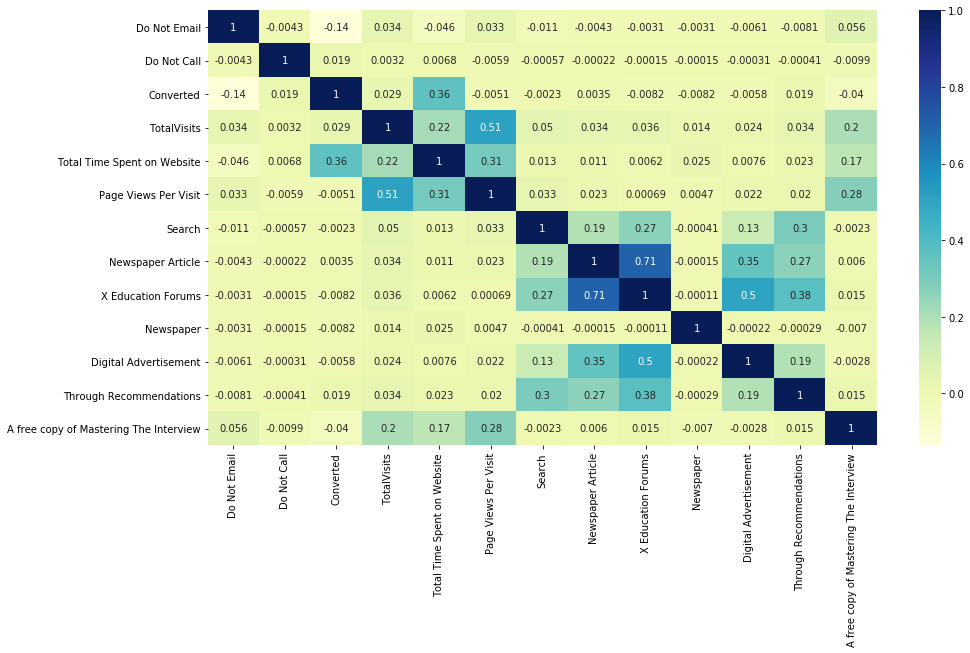

In [47]:
plt.figure(figsize=(15,8))
sns.heatmap(data=lead.corr(),annot=True,cmap='YlGnBu')

In [48]:
lead_dummy=pd.get_dummies(lead)

In [49]:
lead_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 90 columns):
Do Not Email                                            9240 non-null int64
Do Not Call                                             9240 non-null int64
Converted                                               9240 non-null int64
TotalVisits                                             9240 non-null float64
Total Time Spent on Website                             9240 non-null int64
Page Views Per Visit                                    9240 non-null float64
Search                                                  9240 non-null int64
Newspaper Article                                       9240 non-null int64
X Education Forums                                      9240 non-null int64
Newspaper                                               9240 non-null int64
Digital Advertisement                                   9240 non-null int64
Through Recommendations                              

In [50]:
lead_dummy.drop(['Last Notable Activity_Approached upfront','City_Other Cities','Lead Profile_Other Leads','What is your current occupation_Other','Specialization_Other','Lead Source_Click2call','Lead Origin_API'],axis=1,inplace=True)

- Instead of using dropfirst from getdummies we manually drop these columns since we have considered select as these option which might cause the biased dataset.
- Now the others and if no option is 1 in the dummies we can easily know that this is the option.

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

- Splitting the data and standardizing it.
- After this we apply RFE to eliminate the unwanted features.
- then we see vif and drop the columns with high vif i,e vif>5

In [52]:
X_train,X_test,y_train,y_test=train_test_split(lead_dummy.drop('Converted',axis=1),lead_dummy['Converted'],random_state=100,test_size=0.3,train_size=0.7)

In [53]:
scalar=StandardScaler()

In [54]:
X_train[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']]=scalar.fit_transform(X_train[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']])

In [55]:
X_train.describe()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,6468.000000,6468.000000,6.468000e+03,6.468000e+03,6.468000e+03,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,...,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.0
mean,0.078386,0.000309,-1.129448e-17,-1.609377e-16,-2.013438e-16,0.001701,0.000309,0.000155,0.000155,0.000464,...,0.000155,0.001701,0.367811,0.018553,0.035869,0.000155,0.237477,0.003247,0.004793,0.0
std,0.268799,0.017583,1.000077e+00,1.000077e+00,1.000077e+00,0.041207,0.017583,0.012434,0.012434,0.021533,...,0.012434,0.041207,0.482247,0.134950,0.185978,0.012434,0.425570,0.056892,0.069069,0.0
min,0.000000,0.000000,-6.564336e-01,-8.853708e-01,-1.085519e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,-4.671335e-01,-8.634138e-01,-6.231508e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.000000,-8.853323e-02,-4.352528e-01,-1.607829e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.000000,0.000000,2.900670e-01,8.098906e-01,3.015850e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,1.000000,1.000000,4.685790e+01,3.271816e+00,2.434472e+01,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [56]:
from sklearn.feature_selection import RFE

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
lreg=LogisticRegression()

In [59]:
rfe=RFE(lreg,15)

In [60]:
rfe=rfe.fit(X_train,y_train)

In [111]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 15),
 ('TotalVisits', False, 47),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 48),
 ('Search', False, 38),
 ('Newspaper Article', False, 14),
 ('X Education Forums', False, 43),
 ('Newspaper', False, 6),
 ('Digital Advertisement', False, 9),
 ('Through Recommendations', False, 16),
 ('A free copy of Mastering The Interview', False, 46),
 ('Lead Origin_Landing Page Submission', False, 24),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 50),
 ('Lead Origin_Quick Add Form', False, 39),
 ('Lead Source_Direct Traffic', False, 17),
 ('Lead Source_Facebook', False, 21),
 ('Lead Source_Google', False, 20),
 ('Lead Source_Live Chat', False, 41),
 ('Lead Source_NC_EDM', False, 8),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 18),
 ('Lead Source_Pay per Click Ads', False, 42),
 ('Lead Source_Press_Release', False, 54),
 ('Lead Source_Reference', False, 

- RFE rank indicates the feature ranks which are the top feature.

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [63]:
import statsmodels.api as sm

In [64]:
import warnings as warning 

In [65]:
warning.filterwarnings('ignore')

In [66]:
X_trn=X_train[X_train.columns[rfe.support_]]

In [67]:
mod1=sm.GLM(y_train,(sm.add_constant(X_trn)),family=sm.families.Binomial())
mod1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2550.3
Date:                Mon, 10 Jun 2019   Deviance:                       5100.6
Time:                        00:03:12   Pearson chi2:                 7.98e+03
No. Iterations:                    22   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8464      0.057    -32.335      0.000      -1.958      -1.734
Do Not Email                                            -1.2361      0.169     -7.328      0.000      -1.567      -0.905
Total Time Spent on Website                              1.0946      0.041     26.924      0.000       1.015       1.174
Lead Origin_Lead Add Form                                3.2739      0.197     16.647      0.000       2.888       3.659
Lead Source_Olark Chat                                   1.0164      0.101     10.101      0.000       0.819       1.214
Lead Source_Welingak Website                             2.6663      0.748      3.564      0.000       1.200       4.132
Specialization_Hospitality Management                   -0.9068      0.340     -2.666      0.008      -1.573      -0.240
What is your current occupation_Housewife               24.2086   2.17e+04      0.001      0.999   -4.25e+04    4.25e+04
What is your current occupation_Working Professional     2.5043      0.193     12.976      0.000       2.126       2.883
Lead Profile_Dual Specialization Student                23.8105   1.69e+04      0.001      0.999    -3.3e+04    3.31e+04
Lead Profile_Lateral Student                             3.1504      1.099      2.866      0.004       0.996       5.305
Lead Profile_Potential Lead                              1.7715      0.097     18.243      0.000       1.581       1.962
Lead Profile_Student of SomeSchool                      -1.6663      0.429     -3.880      0.000      -2.508      -0.825
Last Notable Activity_Had a Phone Conversation           3.1436      1.160      2.711      0.007       0.871       5.416
Last Notable Activity_SMS Sent                           1.7303      0.080     21.519      0.000       1.573       1.888
Last Notable Activity_Unreachable                        1.6765      0.556      3.016      0.003       0.587       2.766
========================================================================================================================
"""

In [68]:
X_trn.drop(['What is your current occupation_Housewife'],axis=1,inplace=True)

In [69]:
mod2=sm.GLM(y_train,(sm.add_constant(X_trn)),family=sm.families.Binomial())
mod2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2558.1
Date:                Mon, 10 Jun 2019   Deviance:                       5116.3
Time:                        00:03:12   Pearson chi2:                 8.03e+03
No. Iterations:                    22   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8364      0.057    -32.278      0.000      -1.948      -1.725
Do Not Email                                            -1.2429      0.169     -7.368      0.000      -1.574      -0.912
Total Time Spent on Website                              1.0932      0.041     26.932      0.000       1.014       1.173
Lead Origin_Lead Add Form                                3.2979      0.196     16.801      0.000       2.913       3.683
Lead Source_Olark Chat                                   1.0081      0.100     10.035      0.000       0.811       1.205
Lead Source_Welingak Website                             2.6342      0.748      3.522      0.000       1.168       4.100
Specialization_Hospitality Management                   -0.9141      0.340     -2.688      0.007      -1.581      -0.248
What is your current occupation_Working Professional     2.4976      0.193     12.944      0.000       2.119       2.876
Lead Profile_Dual Specialization Student                23.8073   1.69e+04      0.001      0.999   -3.31e+04    3.31e+04
Lead Profile_Lateral Student                             3.1379      1.100      2.853      0.004       0.983       5.293
Lead Profile_Potential Lead                              1.7672      0.097     18.224      0.000       1.577       1.957
Lead Profile_Student of SomeSchool                      -1.6731      0.430     -3.895      0.000      -2.515      -0.831
Last Notable Activity_Had a Phone Conversation           3.1348      1.159      2.704      0.007       0.863       5.407
Last Notable Activity_SMS Sent                           1.7221      0.080     21.439      0.000       1.565       1.880
Last Notable Activity_Unreachable                        1.6685      0.556      3.003      0.003       0.579       2.758
========================================================================================================================
"""

In [70]:
X_trn.drop(['Lead Profile_Dual Specialization Student'],axis=1,inplace=True)
X_trncof=sm.add_constant(X_trn)
mod3=sm.GLM(y_train,(X_trncof),family=sm.families.Binomial())
res=mod3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2571.1
Date:                Mon, 10 Jun 2019   Deviance:                       5142.1
Time:                        00:03:12   Pearson chi2:                 8.09e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8262      0.057    -32.222      0.000      -1.937      -1.715
Do Not Email                                            -1.2284      0.168     -7.332      0.000      -1.557      -0.900
Total Time Spent on Website                              1.0954      0.041     27.009      0.000       1.016       1.175
Lead Origin_Lead Add Form                                3.2909      0.196     16.775      0.000       2.906       3.675
Lead Source_Olark Chat                                   1.0090      0.100     10.071      0.000       0.813       1.205
Lead Source_Welingak Website                             2.6309      0.748      3.518      0.000       1.165       4.097
Specialization_Hospitality Management                   -0.9256      0.340     -2.723      0.006      -1.592      -0.259
What is your current occupation_Working Professional     2.5291      0.192     13.169      0.000       2.153       2.906
Lead Profile_Lateral Student                             3.1274      1.100      2.844      0.004       0.972       5.283
Lead Profile_Potential Lead                              1.7558      0.097     18.115      0.000       1.566       1.946
Lead Profile_Student of SomeSchool                      -1.6873      0.430     -3.925      0.000      -2.530      -0.845
Last Notable Activity_Had a Phone Conversation           3.1293      1.159      2.701      0.007       0.858       5.400
Last Notable Activity_SMS Sent                           1.7195      0.080     21.445      0.000       1.562       1.877
Last Notable Activity_Unreachable                        1.6606      0.555      2.990      0.003       0.572       2.749
========================================================================================================================
"""

In [71]:
def knowvif(X_train_new):
    Vif=pd.DataFrame()
    Vif['factors']=X_train_new.columns
    Vif['vif']=[variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
    Vif['vif']=round(Vif['vif'],2)
    return Vif.sort_values(by='vif',ascending=False)

In [72]:
knowvif(X_trncof.drop('const',axis=1))

,factors,vif
2,Lead Origin_Lead Add Form,1.55
8,Lead Profile_Potential Lead,1.35
4,Lead Source_Welingak Website,1.26
1,Total Time Spent on Website,1.25
6,What is your current occupation_Working Profes...,1.23
3,Lead Source_Olark Chat,1.21
11,Last Notable Activity_SMS Sent,1.18
0,Do Not Email,1.03
9,Lead Profile_Student of SomeSchool,1.02
5,Specialization_Hospitality Management,1.01


In [73]:
y_train_pred=res.predict(X_trncof).values.reshape(-1)

- Creating lead score as (probability that the record is the lead *100 ) rounding it to 2 decimal places.

In [74]:
y_train_pred_final = pd.DataFrame({'YTrainProbability':y_train_pred, 'LeadStatus':y_train.values})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,YTrainProbability,LeadStatus,CustID
0,0.143444,0,1871
1,0.139442,0,6795
2,0.171573,0,3516
3,0.800394,0,8105
4,0.143444,0,3934


In [75]:
y_train_pred_final['LeadScore']=round(y_train_pred_final['YTrainProbability']*100,2)

In [76]:
y_train_pred_final.tail()

,YTrainProbability,LeadStatus,CustID,LeadScore
6463,0.973974,1,350,97.40
6464,0.994869,1,79,99.49
6465,0.143444,1,8039,14.34
6466,0.089562,0,6936,8.96
6467,0.143444,0,5640,14.34


- In order to decide the cut off we ROC curve and see the accuracy,sensitivity and specificity.
- This is done by looking into confusion matrix.

In [77]:
from sklearn import metrics

In [78]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [79]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.LeadStatus, y_train_pred_final.YTrainProbability, drop_intermediate = False )

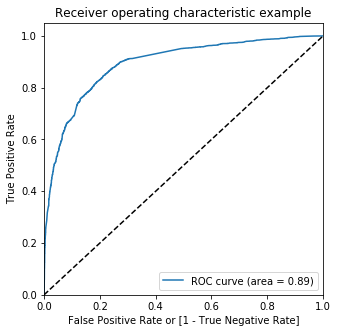

In [80]:
draw_roc(y_train_pred_final.LeadStatus, y_train_pred_final.YTrainProbability)

In [81]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.YTrainProbability.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,YTrainProbability,LeadStatus,CustID,LeadScore,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.143444,0,1871,14.34,1,1,0,0,0,0,0,0,0,0
1,0.139442,0,6795,13.94,1,1,0,0,0,0,0,0,0,0
2,0.171573,0,3516,17.16,1,1,0,0,0,0,0,0,0,0
3,0.800394,0,8105,80.04,1,1,1,1,1,1,1,1,1,0
4,0.143444,0,3934,14.34,1,1,0,0,0,0,0,0,0,0


In [82]:

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.LeadStatus, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.618738  0.962693  0.406797
0.2   0.2  0.791126  0.899432  0.724388
0.3   0.3  0.807669  0.852393  0.780110
0.4   0.4  0.821583  0.780616  0.846827
0.5   0.5  0.818027  0.675588  0.905797
0.6   0.6  0.815553  0.629765  0.930035
0.7   0.7  0.798237  0.551500  0.950275
0.8   0.8  0.776592  0.462287  0.970265
0.9   0.9  0.737631  0.334955  0.985757


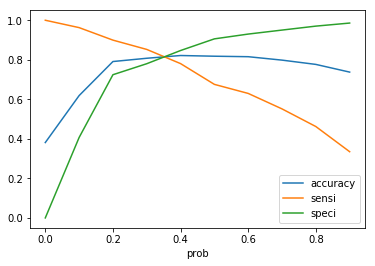

In [83]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- We can see from the above graph cutoff probability that compromises all the parameters accuracy,sensitivity and specificity is 0.35.

- if the probability is >0.35 than he is a potential lead else otherwise.

In [84]:
y_train_pred_final['final_predicted'] = y_train_pred_final.YTrainProbability.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,YTrainProbability,LeadStatus,CustID,LeadScore,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0.143444,0,1871,14.34,1,1,0,0,0,0,0,0,0,0,0
1,0.139442,0,6795,13.94,1,1,0,0,0,0,0,0,0,0,0
2,0.171573,0,3516,17.16,1,1,0,0,0,0,0,0,0,0,0
3,0.800394,0,8105,80.04,1,1,1,1,1,1,1,1,1,0,1
4,0.143444,0,3934,14.34,1,1,0,0,0,0,0,0,0,0,0


In [85]:
metrics.accuracy_score(y_train_pred_final.LeadStatus, y_train_pred_final.final_predicted)

0.8152442795299938

In [86]:
confusion = metrics.confusion_matrix(y_train_pred_final.LeadStatus, y_train_pred_final.final_predicted )
confusion

array([[3255,  747],
       [ 448, 2018]], dtype=int64)

In [87]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [88]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8183292781832928

- sensitivity=81.83%

In [89]:
# Let us calculate specificity
TN / float(TN+FP)

0.8133433283358321

- specificity=81.33

In [90]:
# Calculate false postive rate - predicting customer as lead when customer is not a potential lead
print(FP/ float(TN+FP))

0.1866566716641679


In [91]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7298372513562387


In [92]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8790170132325141


- We perform similar operation on test and see the value of parameters.

In [93]:
X_test[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']]=scalar.transform(X_test[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']])

In [94]:
X_test_cols=X_test[X_trn.columns]

In [95]:
X_test_cons=sm.add_constant(X_test_cols)

In [96]:
y_test_pred=res.predict(X_test_cons)

In [97]:
y_test_final=pd.DataFrame(y_test.values,columns=['LeadStatus'])

In [98]:
y_test_final['CustID']=y_test.index

In [99]:
y_test_final.reset_index(drop=True,inplace=True)
y_test_pred.reset_index(drop=True,inplace=True)

In [100]:
y_test_final['YTestPred']=y_test_pred

In [101]:
y_test_final['PredLeadStatus']=y_test_final.YTestPred.map(lambda x: 1 if x>0.35 else 0)

In [102]:
y_test_final['leadScore']=round(y_test_final.YTestPred*100,2)

In [103]:
y_test_final.head()

,LeadStatus,CustID,YTestPred,PredLeadStatus,leadScore
0,1,4269,0.721078,1,72.11
1,1,2376,0.901536,1,90.15
2,1,7766,0.819344,1,81.93
3,0,9199,0.492217,1,49.22
4,1,4359,0.904716,1,90.47


In [104]:
metrics.accuracy_score(y_test_final.LeadStatus,y_test_final.PredLeadStatus)

0.81998556998557

- accuracy=82% from above.

In [105]:
confusion2=metrics.confusion_matrix(y_test_final.LeadStatus,y_test_final.PredLeadStatus)

In [106]:
confusion2

array([[1393,  284],
       [ 215,  880]], dtype=int64)

In [107]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [108]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8036529680365296

- sensitivity=80.36% from above.

In [109]:
# Let us calculate specificity
TN / float(TN+FP)

0.8306499701848539

- specificity=83% from above.